In [73]:
import numpy as np 
import pandas as pd 
import os

import seaborn as sns 
import matplotlib.pyplot as plt 
import csv

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import numpy as np


In [14]:
df = pd.read_csv('C:\\Users\\siddh\\Desktop\\DES\\MLAtLast\\final_df.csv')

In [15]:
df = df.drop('Unnamed: 0', axis = 1)

In [35]:
df = df[~(df['503.01a'] <= 0)]

In [40]:
df = df[~(df['2A1'] <= 0)]
df = df[~(df['3A1'] <= 0)]
df = df[~(df['5A2'] <= 0)]
df = df[~(df['7B1'] <= 0)]

In [45]:
df = df[~(df['503.01a'] >= 10)]
df = df[~(df['2A1'] >= 10)]
df = df[~(df['3A1'] >= 10)]
df = df[~(df['5A2'] >= 10)]
df = df[~(df['7B1'] >= 10)]

In [74]:
twoa1 = df['2A1']
threea1 = df['3A1']
target = df['503.01a']
fivea2 = df['5A2']
sevenb1 = df['7B1']

Text(0.5, 1.0, 'Nitrate')

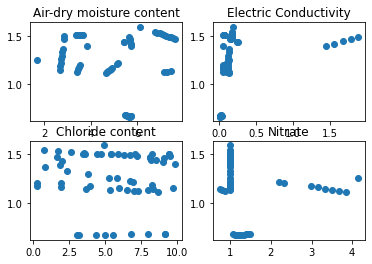

In [80]:
fig, axs = plt.subplots(2,2)
axs[0][0].scatter(twoa1, target)
axs[0, 0].set_title('Air-dry moisture content')

axs[0][1].scatter(threea1, target)
axs[0, 1].set_title('Electric Conductivity')

axs[1][0].scatter(fivea2, target)
axs[1, 0].set_title('Chloride content')

axs[1][1].scatter(sevenb1, target)
axs[1, 1].set_title('Nitrate')


In [81]:
for ax in axs.flat: 
    print(ax)

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


In [82]:
ax[0][0].set(xlabel='x-label', ylabel='y-label')

TypeError: 'AxesSubplot' object is not subscriptable

In [47]:
df1 = pd.DataFrame({'2A1': twoa1, 'target': target})
df2 = pd.DataFrame({'3A1': threea1, 'target': target})
df3 = pd.DataFrame({'5A2': fivea2, 'target': target})


In [48]:
df4 = pd.DataFrame({'7B1': sevenb1, 'target': target})


<AxesSubplot:xlabel='2A1', ylabel='target'>

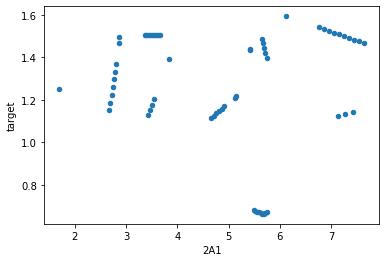

In [66]:
df1.plot.scatter(x = '2A1', y = 'target',s=None, c=None,)

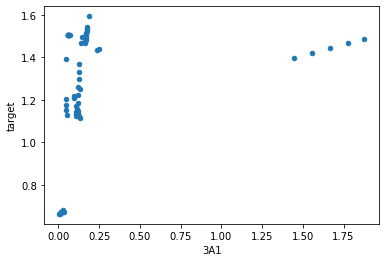

In [62]:
df2.plot.scatter( x = '3A1', y = 'target');

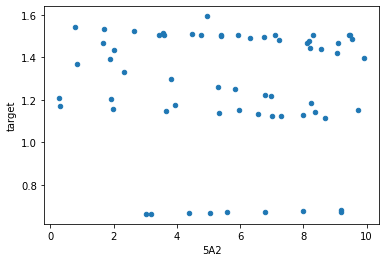

In [64]:
df3.plot.scatter(x = '5A2', y = 'target');

<AxesSubplot:xlabel='7B1', ylabel='target'>

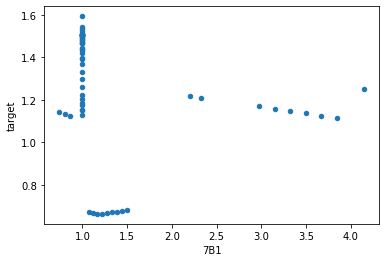

In [65]:
df4.plot.scatter(x = '7B1', y = 'target')

In [17]:
co = df.corr()
co

,2A1,3A1,503.01a,5A2,7B1
2A1,1.000000,-0.047336,0.158138,-0.211667,-0.012944
3A1,-0.047336,1.000000,-0.000320,0.386211,0.183959
503.01a,0.158138,-0.000320,1.000000,0.080168,0.029390
5A2,-0.211667,0.386211,0.080168,1.000000,-0.045060
7B1,-0.012944,0.183959,0.029390,-0.045060,1.000000


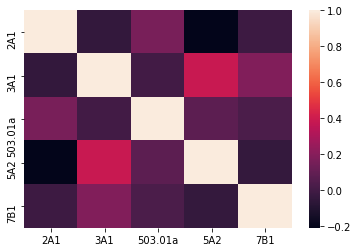

In [6]:
sns.heatmap(df.corr());

In [4]:
# Linear Regression

In [13]:
X = df.drop('503.01a', axis = 1)
y = df['503.01a']

In [9]:
X = df.drop('503.01a', axis = 1)
y = df['503.01a']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [15]:
y_prediction =  LR.predict(x_test)

In [16]:
y_prediction

array([-1052.50550211,  -535.90577434, -1021.92440349, ...,
       -1047.22396904, -1023.51265101,  -348.8318923 ])

In [31]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score

In [32]:
score=r2_score(y_test,y_prediction)

In [33]:
print('r2 score is ',score)

r2 score is  -6.3542521673942245


In [34]:
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))

mean_sqrd_error is== 0.32836789699804775


In [35]:
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

root_mean_squared error of is== 0.5730339405288728


In [36]:
y_test

11114    1.066679
3314     1.351741
8757     1.240000
3286     1.306300
2197     1.612180
           ...   
14509    1.604635
8860     2.030121
8993     1.438282
7375     1.511611
4274     1.298039
Name: 503.01a, Length: 2786, dtype: float64

In [37]:
y_prediction

array([1.51963485, 1.51263714, 1.59105208, ..., 1.64631214, 1.36951057,
       1.57972163])

In [9]:
del_rows = []
for line, row in df.iterrows(): 
    if (row['503.01a'] <= -9999.00000): 
        del_rows.append(line)
    

In [10]:
len(del_rows)

1410

In [11]:
del_rows[5]

1325

In [12]:
df.iloc[1325]

2A1           3.664128
3A1           0.018906
503.01a   -9999.000000
5A2          19.999692
7B1           0.999996
Name: 1325, dtype: float64

In [23]:
df = df.drop(del_rows, axis = 0)

In [17]:
len(df)

15340

In [25]:
co = df.corr()
co

,2A1,3A1,503.01a,5A2,7B1
2A1,1.000000,-0.043959,0.044067,-0.217898,-0.019493
3A1,-0.043959,1.000000,0.733098,0.455976,0.106786
503.01a,0.044067,0.733098,1.000000,0.024374,0.146211
5A2,-0.217898,0.455976,0.024374,1.000000,-0.050855
7B1,-0.019493,0.106786,0.146211,-0.050855,1.000000


<AxesSubplot:>

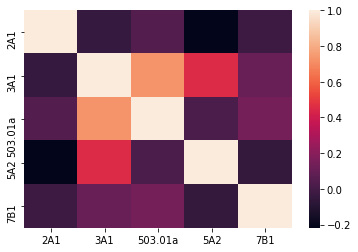

In [26]:
sns.heatmap(df.corr())

In [69]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Multiple Linear Regression

In [15]:
X = df.drop('503.01a', axis = 1)
y = df['503.01a']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [16]:
y_prediction =  LR.predict(x_test)

In [23]:
r2_score(y_test,y_prediction), np.sqrt(mean_squared_error(y_test,y_prediction))

(-6.3542521673942245, 0.5730339405288728)

In [24]:
#poly = PolynomialFeatures()
#X_poly = poly.fit_transform(x_train)

In [25]:
#poly.fit(X_poly, y_train)
#lin2 = LinearRegression()
#lin2.fit(X_poly, y_train)

In [26]:
# y_prediction =  LR.predict(x_test)

In [27]:
# y_prediction1 = lin2.predict(x_test)

In [28]:
r2_score(y_test, y_prediction)

-6.3542521673942245

In [29]:
LR.coef_

array([-1.55994329e-06,  7.21954999e-01, -1.22868731e-03,  6.44117015e-03])

In [30]:
LR.score(x_test, y_test)




-6.3542521673942245

# Decision Tree Regressor

In [39]:
import numpy as np 
  
# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt
  
# import pandas for importing csv files 
import pandas as pd 


from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [40]:

std_slc = StandardScaler()
pca = decomposition.PCA()

dec_tree = tree.DecisionTree()

AttributeError: module 'sklearn.tree' has no attribute 'DecisionTree'

In [257]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [41]:
n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]


parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [42]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)

NameError: name 'pipe' is not defined

In [43]:
 print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])

NameError: name 'clf_GS' is not defined

In [44]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])

NameError: name 'clf_GS' is not defined

In [36]:
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

NameError: name 'clf_GS' is not defined

In [10]:
from sklearn.tree import DecisionTreeRegressor 
  
    
    
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 9) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=9)

In [46]:
y_pred = regressor.predict(x_train)

In [47]:
y_pred

array([1.8600794 , 1.69182726, 1.72450089, ..., 1.56613751, 1.37391586,
       1.55175629])

In [48]:
# import export_graphviz
from sklearn.tree import export_graphviz
import graphviz
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.png', feature_names =['1', '2', '3', '4'])

In [49]:
fig = plt.figure(figsize=(25,20))
from sklearn import tree

<Figure size 1800x1440 with 0 Axes>

In [42]:
#_ = tree.plot_tree(regressor, 
#                   feature_names=['1', '2', '3', '4'],  
#                   class_names=['target'],
#                   filled=True)

In [50]:
yp = regressor.predict(x_test)

In [51]:
r2_score(y_test,yp)

0.8590806347218987

In [52]:
regressor.feature_importances_

array([0.01068105, 0.97581319, 0.006546  , 0.00695976])

In [53]:
np.sqrt(mean_squared_error(y_test,yp))

0.07932250603281964

In [54]:
mean_squared_error(y_test,yp)

0.006292059963326707

# Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [71]:
rf_y_pred = rf.predict(x_test)

In [72]:

r2_score(y_test,rf_y_pred), np.sqrt(mean_squared_error(y_test,rf_y_pred))

NameError: name 'r2_score' is not defined

In [ ]:
rf.feature_importances_

In [110]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [272]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [273]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [67]:
rf = RandomForestRegressor(n_estimators = 400, min_samples_split = 2, min_samples_leaf= 1, max_features= 'sqrt',
                          bootstrap = False)

In [68]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400)

In [68]:
rf_y_pred = rf.predict(x_test)

NameError: name 'rf' is not defined

In [98]:
r2_score(y_test,rf_y_pred), (mean_squared_error(y_test,rf_y_pred))

(0.9329759659087993, 0.0029926280227961155)

In [99]:
rf.feature_importances_

array([0.3617213 , 0.46493213, 0.00659077, 0.1667558 ])

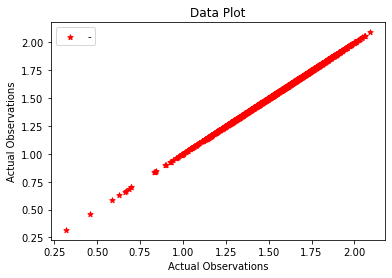

In [116]:
import matplotlib.pyplot as plt
  
# x-axis values
x = y_test
# y-axis values
y = y_test
  
# plotting points as a scatter plot
plt.scatter(x, y, label= "-", color= "red", 
            marker= "*", s=30)
  
# x-axis label
plt.xlabel('Actual Observations')
# frequency label
plt.ylabel('Actual Observations')
# plot title
plt.title('Data Plot')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()

In [67]:
# x-axis values
x = y_test
# y-axis values
y = rf_y_pred
  
# plotting points as a scatter plot
plt.scatter(x, y, label= "-", color= "red", 
            marker= "*", s=30)
  
# x-axis label
plt.xlabel('Actual Observations')
# frequency label
plt.ylabel('Predicted Observations')
# plot title
plt.title('Data Plot')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()

NameError: name 'rf_y_pred' is not defined

# Gradient Boosted Regression Trees

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

In [73]:
est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=0.5)

In [74]:
est.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.56, max_depth=1, n_estimators=1000)

In [75]:
gbr_yp = est.predict(x_test)

In [76]:
r2_score(y_test,gbr_yp)

0.4237748447133347

In [77]:
np.sqrt(mean_squared_error(y_test,gbr_yp)), (mean_squared_error(y_test,gbr_yp))

(0.1604010452448564, 0.02572849531564247)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [83]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [84]:
grid_GBR.best_params_

{'learning_rate': 0.04,
 'max_depth': 10,
 'n_estimators': 1500,
 'subsample': 0.5}

In [85]:
gbrt = GradientBoostingRegressor(n_estimators=1500, max_depth=10, learning_rate=0.03, subsample=0.5)

In [86]:
gbrt.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=10, n_estimators=1500,
                          subsample=0.5)

In [94]:
gbrt_y = gbrt.predict(x_test)

In [95]:
r2_score(y_test,gbrt_y)

0.9253986821205821

In [96]:
np.sqrt(mean_squared_error(y_test,gbrt_y)), (mean_squared_error(y_test,gbrt_y))

(0.0577144201908969, 0.003330954297971407)

In [212]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [213]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [214]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(x_train_std, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)

In [216]:
print("Model Accuracy: %.3f" % gbr.score(x_test_std, y_test))

Model Accuracy: 0.482


In [218]:
mse = mean_squared_error(y_test, gbr.predict(x_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0231


In [222]:
gbr.feature_importances_

array([0.31752481, 0.36200549, 0.00344729, 0.3170224 ])

# Boosting

In [223]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [224]:
boost = GradientBoostingRegressor(n_estimators=100,
                                max_depth=3,
                                learning_rate=0.1,
                                min_samples_split=3)

In [226]:
boost.fit(x_train, y_train)

GradientBoostingRegressor(min_samples_split=3)

In [230]:
y_ts = boost.predict(x_test)

boost.score(x_test, y_test)

0.49160270833379704

In [231]:
r2_score(y_test, y_ts)

0.49160270833379704

# Support Vector Machines

In [236]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
xt = sc_X.fit_transform(x_train)
yt = sc_y.fit_transform(y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1.8600794  1.69182726 1.72450089 ... 1.56613751 1.37391586 1.55175629].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [238]:
from sklearn.svm import SVR

In [250]:
svm =  SVR(kernel='rbf')
svm.fit(x_train, y_train)

SVR()

In [251]:
y_svm = svm.predict(x_test)

In [252]:
r2_score(y_svm, y_test)

-6.644292018486207

In [242]:
xt = StandardScaler().fit_transform(x_train)

AttributeError: 'list' object has no attribute 'reshape'